# Metal Recovery ML

The data is stored in three files:

gold_recovery_train.csv — training dataset [download](https://practicum-content.s3.us-west-1.amazonaws.com/datasets/gold_recovery_train.csv)

gold_recovery_test.csv — test dataset [download](https://practicum-content.s3.us-west-1.amazonaws.com/datasets/gold_recovery_test.csv)

gold_recovery_full.csv — source dataset [download](https://practicum-content.s3.us-west-1.amazonaws.com/datasets/gold_recovery_full.csv)

Data is indexed with the date and time of acquisition (date feature). Parameters that are next to each other in terms of time are often similar. Some of the features that are present in the training set may be absent from the test set. The test set also doesn't contain targets.The source dataset contains the training and test sets with all the features.

It starts off as raw data that was downloaded from the warehouse.



In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, make_scorer
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import StandardScaler

## Prepare the data

### Open the files and look into the data.

In [2]:
train_df = pd.read_csv('./datasets/gold_recovery_train.csv')
test_df = pd.read_csv('./datasets/gold_recovery_test.csv')
full_df = pd.read_csv('./datasets/gold_recovery_full.csv')

### Train DF

In [3]:
print(train_df.head())

                  date  final.output.concentrate_ag  \
0  2016-01-15 00:00:00                     6.055403   
1  2016-01-15 01:00:00                     6.029369   
2  2016-01-15 02:00:00                     6.055926   
3  2016-01-15 03:00:00                     6.047977   
4  2016-01-15 04:00:00                     6.148599   

   final.output.concentrate_pb  final.output.concentrate_sol  \
0                     9.889648                      5.507324   
1                     9.968944                      5.257781   
2                    10.213995                      5.383759   
3                     9.977019                      4.858634   
4                    10.142511                      4.939416   

   final.output.concentrate_au  final.output.recovery  final.output.tail_ag  \
0                    42.192020              70.541216             10.411962   
1                    42.701629              69.266198             10.462676   
2                    42.657501              68.

In [4]:
print(train_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16860 entries, 0 to 16859
Data columns (total 87 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   date                                                16860 non-null  object 
 1   final.output.concentrate_ag                         16788 non-null  float64
 2   final.output.concentrate_pb                         16788 non-null  float64
 3   final.output.concentrate_sol                        16490 non-null  float64
 4   final.output.concentrate_au                         16789 non-null  float64
 5   final.output.recovery                               15339 non-null  float64
 6   final.output.tail_ag                                16794 non-null  float64
 7   final.output.tail_pb                                16677 non-null  float64
 8   final.output.tail_sol                               16715 non-null  float64


In [5]:
print(train_df.isna().sum())

date                                            0
final.output.concentrate_ag                    72
final.output.concentrate_pb                    72
final.output.concentrate_sol                  370
final.output.concentrate_au                    71
                                             ... 
secondary_cleaner.state.floatbank5_a_level     85
secondary_cleaner.state.floatbank5_b_air       85
secondary_cleaner.state.floatbank5_b_level     84
secondary_cleaner.state.floatbank6_a_air      103
secondary_cleaner.state.floatbank6_a_level     85
Length: 87, dtype: int64


In [6]:
print(train_df.shape)

(16860, 87)


### Test DF 

In [7]:
print(test_df.head())

                  date  primary_cleaner.input.sulfate  \
0  2016-09-01 00:59:59                     210.800909   
1  2016-09-01 01:59:59                     215.392455   
2  2016-09-01 02:59:59                     215.259946   
3  2016-09-01 03:59:59                     215.336236   
4  2016-09-01 04:59:59                     199.099327   

   primary_cleaner.input.depressant  primary_cleaner.input.feed_size  \
0                         14.993118                         8.080000   
1                         14.987471                         8.080000   
2                         12.884934                         7.786667   
3                         12.006805                         7.640000   
4                         10.682530                         7.530000   

   primary_cleaner.input.xanthate  primary_cleaner.state.floatbank8_a_air  \
0                        1.005021                             1398.981301   
1                        0.990469                             1398.777

In [8]:

print(test_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5856 entries, 0 to 5855
Data columns (total 53 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   date                                        5856 non-null   object 
 1   primary_cleaner.input.sulfate               5554 non-null   float64
 2   primary_cleaner.input.depressant            5572 non-null   float64
 3   primary_cleaner.input.feed_size             5856 non-null   float64
 4   primary_cleaner.input.xanthate              5690 non-null   float64
 5   primary_cleaner.state.floatbank8_a_air      5840 non-null   float64
 6   primary_cleaner.state.floatbank8_a_level    5840 non-null   float64
 7   primary_cleaner.state.floatbank8_b_air      5840 non-null   float64
 8   primary_cleaner.state.floatbank8_b_level    5840 non-null   float64
 9   primary_cleaner.state.floatbank8_c_air      5840 non-null   float64
 10  primary_clea

In [9]:
print(test_df.isna().sum())

date                                            0
primary_cleaner.input.sulfate                 302
primary_cleaner.input.depressant              284
primary_cleaner.input.feed_size                 0
primary_cleaner.input.xanthate                166
primary_cleaner.state.floatbank8_a_air         16
primary_cleaner.state.floatbank8_a_level       16
primary_cleaner.state.floatbank8_b_air         16
primary_cleaner.state.floatbank8_b_level       16
primary_cleaner.state.floatbank8_c_air         16
primary_cleaner.state.floatbank8_c_level       16
primary_cleaner.state.floatbank8_d_air         16
primary_cleaner.state.floatbank8_d_level       16
rougher.input.feed_ag                          16
rougher.input.feed_pb                          16
rougher.input.feed_rate                        40
rougher.input.feed_size                        22
rougher.input.feed_sol                         67
rougher.input.feed_au                          16
rougher.input.floatbank10_sulfate             257


In [10]:
print(test_df.shape)

(5856, 53)


### Full DF

In [11]:
print(full_df.head())

                  date  final.output.concentrate_ag  \
0  2016-01-15 00:00:00                     6.055403   
1  2016-01-15 01:00:00                     6.029369   
2  2016-01-15 02:00:00                     6.055926   
3  2016-01-15 03:00:00                     6.047977   
4  2016-01-15 04:00:00                     6.148599   

   final.output.concentrate_pb  final.output.concentrate_sol  \
0                     9.889648                      5.507324   
1                     9.968944                      5.257781   
2                    10.213995                      5.383759   
3                     9.977019                      4.858634   
4                    10.142511                      4.939416   

   final.output.concentrate_au  final.output.recovery  final.output.tail_ag  \
0                    42.192020              70.541216             10.411962   
1                    42.701629              69.266198             10.462676   
2                    42.657501              68.

In [12]:
print(full_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22716 entries, 0 to 22715
Data columns (total 87 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   date                                                22716 non-null  object 
 1   final.output.concentrate_ag                         22627 non-null  float64
 2   final.output.concentrate_pb                         22629 non-null  float64
 3   final.output.concentrate_sol                        22331 non-null  float64
 4   final.output.concentrate_au                         22630 non-null  float64
 5   final.output.recovery                               20753 non-null  float64
 6   final.output.tail_ag                                22633 non-null  float64
 7   final.output.tail_pb                                22516 non-null  float64
 8   final.output.tail_sol                               22445 non-null  float64


In [13]:
print(full_df.isna().sum())

date                                            0
final.output.concentrate_ag                    89
final.output.concentrate_pb                    87
final.output.concentrate_sol                  385
final.output.concentrate_au                    86
                                             ... 
secondary_cleaner.state.floatbank5_a_level    101
secondary_cleaner.state.floatbank5_b_air      101
secondary_cleaner.state.floatbank5_b_level    100
secondary_cleaner.state.floatbank6_a_air      119
secondary_cleaner.state.floatbank6_a_level    101
Length: 87, dtype: int64


In [14]:
print(full_df.shape)

(22716, 87)


### Function for missing values 

In [15]:

def missing_values(df):
    missing = df.isnull().sum()
    total = np.product(df.shape)
    missing_percent = (missing / total) * 100
    return missing_percent


missing_train = missing_values(train_df)
missing_test = missing_values(test_df)
missing_full = missing_values(full_df)


print("Missing values % in training dataset:\n", missing_train)
print("\nMissing values % in test dataset:\n", missing_test)
print("\nMissing values % in full dataset:\n", missing_full)

Missing values % in training dataset:
 date                                          0.000000
final.output.concentrate_ag                   0.004909
final.output.concentrate_pb                   0.004909
final.output.concentrate_sol                  0.025225
final.output.concentrate_au                   0.004840
                                                ...   
secondary_cleaner.state.floatbank5_a_level    0.005795
secondary_cleaner.state.floatbank5_b_air      0.005795
secondary_cleaner.state.floatbank5_b_level    0.005727
secondary_cleaner.state.floatbank6_a_air      0.007022
secondary_cleaner.state.floatbank6_a_level    0.005795
Length: 87, dtype: float64

Missing values % in test dataset:
 date                                          0.000000
primary_cleaner.input.sulfate                 0.097304
primary_cleaner.input.depressant              0.091504
primary_cleaner.input.feed_size               0.000000
primary_cleaner.input.xanthate                0.053485
primary_cleaner.st

C:\Users\Somil Patel\AppData\Local\Temp\ipykernel_22680\2285714423.py:8: DeprecationWarning: `product` is deprecated as of NumPy 1.25.0, and will be removed in NumPy 2.0. Please use `prod` instead.
  missing_train = missing_values(train_df)
C:\Users\Somil Patel\AppData\Local\Temp\ipykernel_22680\2285714423.py:9: DeprecationWarning: `product` is deprecated as of NumPy 1.25.0, and will be removed in NumPy 2.0. Please use `prod` instead.
  missing_test = missing_values(test_df)
C:\Users\Somil Patel\AppData\Local\Temp\ipykernel_22680\2285714423.py:10: DeprecationWarning: `product` is deprecated as of NumPy 1.25.0, and will be removed in NumPy 2.0. Please use `prod` instead.
  missing_full = missing_values(full_df)


I calculated missing values percentage for each dataset by writing a function to find missing values percentage for each dataset and printed the results. The amounts of missing data are all less than 1% of the data.

### Check that recovery is calculated correctly. 

Cleaned the dataset by dropping missing values for the calculation. Formula for recovery: (C * (F - T)) / (F * (C - T)) * 100. Used the necessary columns for the recovery calculation and calculated the recovery. I then found the Mean Absolute Error (MAE) between the calculated recovery and the actual 'rougher.output.recovery' feature value.


In [16]:
train_cleaned = train_df.dropna(subset=['rougher.output.concentrate_au', 'rougher.input.feed_au', 'rougher.output.tail_au', 'rougher.output.recovery'])
C = train_cleaned['rougher.output.concentrate_au']
F = train_cleaned['rougher.input.feed_au']
T = train_cleaned['rougher.output.tail_au']

calculated_recovery = (C * (F - T)) / (F * (C - T)) * 100

actual_recovery = train_cleaned['rougher.output.recovery']
mae_recovery = mean_absolute_error(actual_recovery, calculated_recovery)

print('MAE:', mae_recovery)

MAE: 9.303415616264301e-15


### Analyze the features not available in the test set

I identified features that are in the training set but not in the test set and displayed the missing feature and their data types. All the datatypes are float64.


In [17]:
missing_features_test = set(train_df.columns) - set(test_df.columns)
missing_features = train_df[list(missing_features_test)].dtypes
missing_features

primary_cleaner.output.tail_ag                        float64
rougher.output.recovery                               float64
primary_cleaner.output.concentrate_sol                float64
rougher.calculation.sulfate_to_au_concentrate         float64
final.output.concentrate_sol                          float64
primary_cleaner.output.concentrate_pb                 float64
final.output.concentrate_ag                           float64
rougher.calculation.floatbank11_sulfate_to_au_feed    float64
final.output.concentrate_au                           float64
rougher.output.tail_sol                               float64
secondary_cleaner.output.tail_sol                     float64
final.output.tail_au                                  float64
primary_cleaner.output.tail_pb                        float64
rougher.output.tail_pb                                float64
primary_cleaner.output.tail_au                        float64
primary_cleaner.output.tail_sol                       float64
rougher.

In [18]:
train_df.columns

Index(['date', 'final.output.concentrate_ag', 'final.output.concentrate_pb',
       'final.output.concentrate_sol', 'final.output.concentrate_au',
       'final.output.recovery', 'final.output.tail_ag', 'final.output.tail_pb',
       'final.output.tail_sol', 'final.output.tail_au',
       'primary_cleaner.input.sulfate', 'primary_cleaner.input.depressant',
       'primary_cleaner.input.feed_size', 'primary_cleaner.input.xanthate',
       'primary_cleaner.output.concentrate_ag',
       'primary_cleaner.output.concentrate_pb',
       'primary_cleaner.output.concentrate_sol',
       'primary_cleaner.output.concentrate_au',
       'primary_cleaner.output.tail_ag', 'primary_cleaner.output.tail_pb',
       'primary_cleaner.output.tail_sol', 'primary_cleaner.output.tail_au',
       'primary_cleaner.state.floatbank8_a_air',
       'primary_cleaner.state.floatbank8_a_level',
       'primary_cleaner.state.floatbank8_b_air',
       'primary_cleaner.state.floatbank8_b_level',
       'primary_clean

### Perform data preprocessing

Filling in missing data in train and test datasets. For catagorical comumns I filled it with the mode and numerical columns with the median value. I then converted all numeric comumnns to float32 type in both datasets.

In [19]:
def preprocessing(df):
    for col in df.columns:
        if df[col].dtype == 'object':
            df[col] = df[col].fillna(df[col].mode()[0])
        else:
            df[col] = df[col].fillna(df[col].mean())

    for col in df.columns:
        if df[col].dtype in ['float64', 'int64']:
            df[col]= df[col].astype('float32')
    if 'date' in df.columns:
        df['date'] = pd.to_datetime(df['date'])
    return df
train_df= preprocessing(train_df)
test_df= preprocessing(test_df)

## Analyze the data

### Concentrations of metals (_Au, Ag, Pb_)

Used a loop to calculate the mean concentrations of gold(AU), silver(AG), and lead(PB) during diffrent stanges of the purification process. Starting off with raw feed, rougher concentrate, after primary cleaning,  and final output concentrate. Overall the purification process uncreases the concentration of the metals as it progresses along the stages then graphed the data for better visulization of the information.

In [20]:
mean_concentrations = {
    f'{stage}_{metal}': 
    train_df[f'rougher.input.feed_{metal}'].mean() 
    if stage == 'raw_feed' 
    else train_df[f'{process}.output.concentrate_{metal}'].mean()
    for process, stages in {
        'rougher': ['rougher_concentrate'],
        'primary_cleaner': ['primary_cleaner_concentrate'],
        'final': ['final_concentrate']
    }.items()
    for stage in ['raw_feed'] + stages
    for metal in ['au', 'ag', 'pb']
}
mean_concentrations

{'raw_feed_au': 7.1707172,
 'raw_feed_ag': 7.8323474,
 'raw_feed_pb': 3.2189307,
 'rougher_concentrate_au': 17.401543,
 'rougher_concentrate_ag': 10.580474,
 'rougher_concentrate_pb': 6.8803225,
 'primary_cleaner_concentrate_au': 29.164595,
 'primary_cleaner_concentrate_ag': 7.4226403,
 'primary_cleaner_concentrate_pb': 8.620294,
 'final_concentrate_au': 39.467216,
 'final_concentrate_ag': 4.716907,
 'final_concentrate_pb': 9.11356}

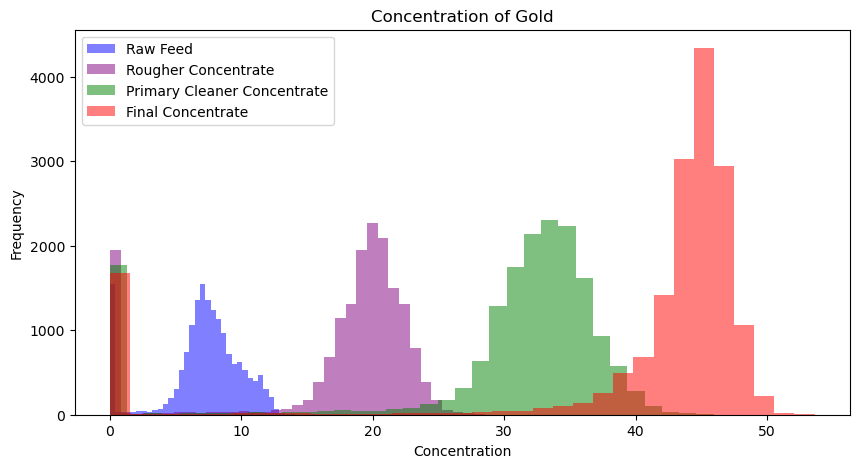

In [21]:
plt.figure(figsize=(10, 5))

plt.hist(train_df['rougher.input.feed_au'], bins=35, alpha=0.5, label='Raw Feed', color='blue')
plt.hist(train_df['rougher.output.concentrate_au'], bins=35, alpha=0.5, label='Rougher Concentrate', color='purple')
plt.hist(train_df['primary_cleaner.output.concentrate_au'], bins=35, alpha=0.5, label='Primary Cleaner Concentrate', color='green')
plt.hist(train_df['final.output.concentrate_au'], bins=35, alpha=0.5, label='Final Concentrate', color='red')

plt.title('Concentration of Gold')
plt.xlabel('Concentration')
plt.ylabel('Frequency')
plt.legend()
plt.show()

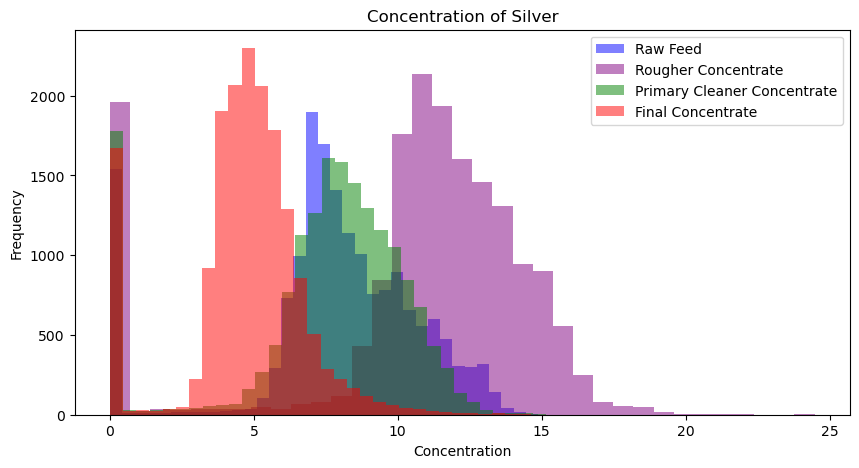

In [22]:
plt.figure(figsize=(10, 5))

plt.hist(train_df['rougher.input.feed_ag'], bins=35, alpha=0.5, label='Raw Feed', color='blue')
plt.hist(train_df['rougher.output.concentrate_ag'], bins=35, alpha=0.5, label='Rougher Concentrate', color='purple')
plt.hist(train_df['primary_cleaner.output.concentrate_ag'], bins=35, alpha=0.5, label='Primary Cleaner Concentrate', color='green')
plt.hist(train_df['final.output.concentrate_ag'], bins=35, alpha=0.5, label='Final Concentrate', color='red')

plt.title('Concentration of Silver')
plt.xlabel('Concentration')
plt.ylabel('Frequency')
plt.legend()
plt.show()

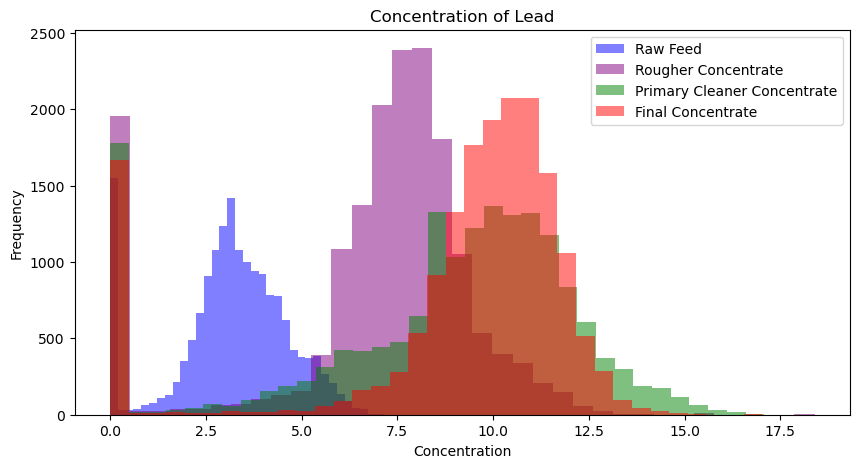

In [23]:
plt.figure(figsize=(10, 5))

plt.hist(train_df['rougher.input.feed_pb'], bins=35, alpha=0.5, label='Raw Feed', color='blue')
plt.hist(train_df['rougher.output.concentrate_pb'], bins=35, alpha=0.5, label='Rougher Concentrate', color='purple')
plt.hist(train_df['primary_cleaner.output.concentrate_pb'], bins=35, alpha=0.5, label='Primary Cleaner Concentrate', color='green')
plt.hist(train_df['final.output.concentrate_pb'], bins=35, alpha=0.5, label='Final Concentrate', color='red')

plt.title('Concentration of Lead')
plt.xlabel('Concentration')
plt.ylabel('Frequency')
plt.legend()
plt.show()

The concentration distributions for the metals Gold, Silver, and Lead all trend toward a increase in concentration as the purification process progresses. Gold went from 7.17 to 39.46. of the 3 metals Gold(au) has the greatest increases in concentrations showing it has the most effective processing with distinct improvements. Silver(ag) on the other hand has improvements after the flotation stages but during the cleaning processes the concentration drops makeing the purification process less efficient than that of Gold. Silver going from 7.83 to 4.71. Lead(pb) has an upward trent during the beginning of the process but tapers off after the primary cleaning of the metal. It started at 3.21 and went to 9.11 as the final concentration.

### Feed particle size distributions

In [24]:
train_df['rougher.input.feed_size'].describe()

count    16860.000000
mean        58.676445
std         23.624889
min          9.659576
25%         47.597875
50%         54.475704
75%         64.587650
max        484.967468
Name: rougher.input.feed_size, dtype: float64

In [25]:
test_df['rougher.input.feed_size'].describe()

count    5856.000000
mean       55.937538
std        22.681513
min         0.046369
25%        43.898468
50%        50.109022
75%        61.608217
max       477.445465
Name: rougher.input.feed_size, dtype: float64

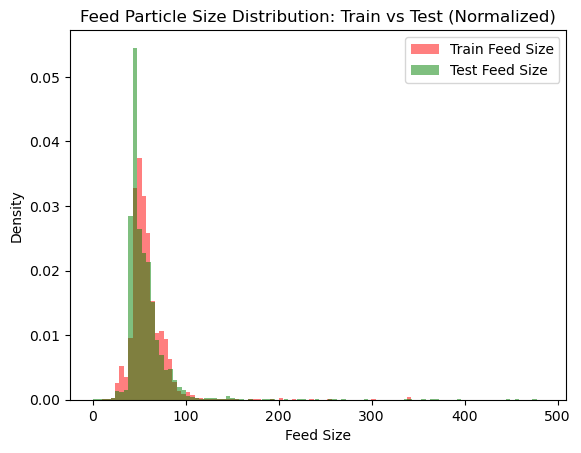

In [26]:
plt.figure()
plt.hist(train_df['rougher.input.feed_size'], bins=100, alpha=0.5, label='Train Feed Size', color='red', density=True)
plt.hist(test_df['rougher.input.feed_size'], bins=100, alpha=0.5, label='Test Feed Size', color='green', density=True)
plt.title('Feed Particle Size Distribution: Train vs Test (Normalized)')
plt.xlabel('Feed Size')
plt.ylabel('Density')
plt.legend()
plt.show()

PLotted the distributions of feed particle sizes from the training and test set. Based on the distributions seem to be similar to one another. The test set has a higher max density. Overall the training set and test set both average in the range between 25-75 feed size. Both datasets contain outliers.

### Total concentrations of all substances in different stages

In [27]:
metals = ['au', 'ag', 'pb']
processes = ['feed', 'rougher', 'primary_cleaner', 'final']

for process in processes:
    if process == 'feed':
        train_df[f'total_{process}_concentration'] = sum(train_df[f'rougher.input.feed_{metal}'] for metal in metals)
    else:
        train_df[f'total_{process}_concentration'] = sum(train_df[f'{process}.output.concentrate_{metal}'] for metal in metals)
    
    print(f'Total {process} concentration sum:\n', train_df[f'total_{process}_concentration'].sum())


Total feed concentration sum:
 307222.8
Total rougher concentration sum:
 587779.0
Total primary_cleaner concentration sum:
 762198.94
Total final concentration sum:
 898598.94


In [28]:
metals = ['au', 'ag', 'pb']
processes = ['feed', 'rougher', 'primary_cleaner', 'final']

for process in processes:
    if process == 'feed':
        train_df[f'total_{process}_concentration'] = sum(train_df[f'rougher.input.feed_{metal}'] for metal in metals)
    else:
        train_df[f'total_{process}_concentration'] = sum(train_df[f'{process}.output.concentrate_{metal}'] for metal in metals)
    
    print(f'Total {process} concentration distribution:\n', train_df[f'total_{process}_concentration'].describe())

Total feed concentration distribution:
 count    16860.000000
mean        18.221994
std          7.304653
min          0.000000
25%         16.139539
50%         18.709881
75%         22.327806
max         35.071987
Name: total_feed_concentration, dtype: float64
Total rougher concentration distribution:
 count    16860.000000
mean        34.862335
std         13.532065
min          0.000000
25%         36.599328
50%         39.451746
75%         41.625835
max         55.568687
Name: total_rougher_concentration, dtype: float64
Total primary_cleaner concentration distribution:
 count    16860.000000
mean        45.207527
std         16.471500
min          0.000000
25%         48.328792
50%         51.260515
75%         53.177716
max         60.269005
Name: total_primary_cleaner_concentration, dtype: float64
Total final concentration distribution:
 count    16860.000000
mean        53.297684
std         18.406199
min          0.000000
25%         58.520161
50%         59.983770
75%       

Looking at the total concentrations of the substances at diffrent stages there are values of 0 or near zero concentration throught the process. In order to better the data I will set a threshold of .1 to remove the abnormal values in the distribution.

In [29]:
threshold = .1

near_zero= [ 
    train_df[f'total_feed_concentration'] < threshold,
    train_df[f'total_rougher_concentration'] < threshold,
    train_df[f'total_primary_cleaner_concentration'] < threshold,
    train_df[f'total_final_concentration'] < threshold
]
print(len(near_zero))



4


In [30]:
train_df = train_df[(train_df[f'total_feed_concentration'] >= threshold) &
    (train_df[f'total_rougher_concentration'] >= threshold) &
    (train_df[f'total_primary_cleaner_concentration'] >= threshold) &
    (train_df[f'total_final_concentration'] >= threshold)]

print(train_df[[f'total_feed_concentration',
                       f'total_rougher_concentration',
                       f'total_primary_cleaner_concentration',
                       f'total_final_concentration']].describe())

       total_feed_concentration  total_rougher_concentration  \
count              14419.000000                 14419.000000   
mean                  20.098270                    39.529274   
std                    4.613378                     4.970397   
min                    0.252715                     0.231744   
25%                   16.870832                    38.000696   
50%                   19.226112                    39.940823   
75%                   22.879564                    41.938856   
max                   35.071987                    55.568687   

       total_primary_cleaner_concentration  total_final_concentration  
count                         14419.000000               14419.000000  
mean                             50.615662                  59.284580  
std                               5.679201                   4.923109  
min                               0.219862                   0.744251  
25%                              49.556532                  59.

### Histograms of the total concentratoins through the process.

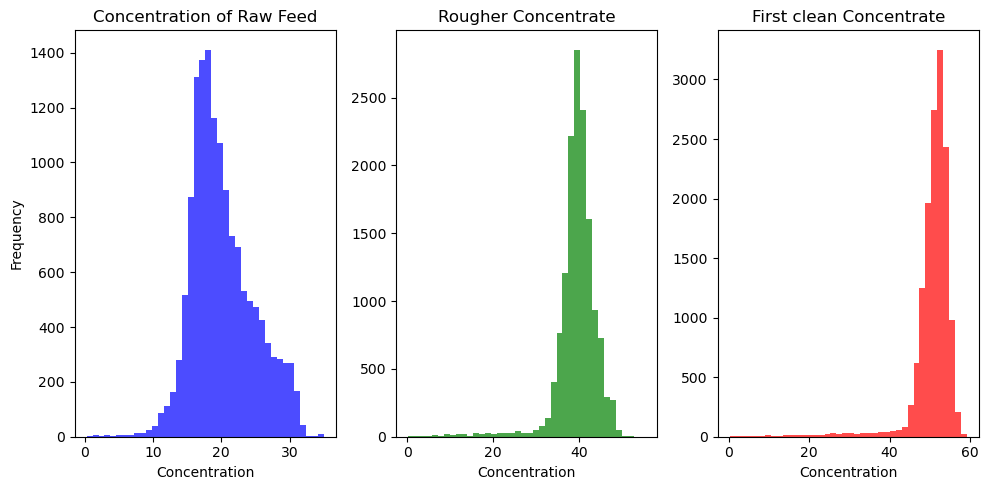

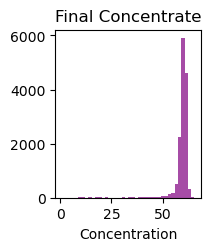

In [31]:
plt.figure(figsize=(10, 5))

plt.subplot(1, 3, 1)
plt.hist(train_df['total_feed_concentration'], bins=40, color='blue', alpha=0.7)
plt.title('Concentration of Raw Feed')
plt.xlabel('Concentration')
plt.ylabel('Frequency')


plt.subplot(1, 3, 2)
plt.hist(train_df['total_rougher_concentration'], bins=40, color='green', alpha=0.7)
plt.title('Rougher Concentrate')
plt.xlabel('Concentration')

plt.subplot(1, 3, 3)
plt.hist(train_df['total_primary_cleaner_concentration'], bins=40, color='red', alpha=0.7)
plt.title('First clean Concentrate')
plt.xlabel('Concentration')

plt.tight_layout()
plt.show()

plt.subplot(2, 3, 3)
plt.hist(train_df['total_final_concentration'], bins=40, color='purple', alpha=0.7)
plt.title('Final Concentrate')
plt.xlabel('Concentration')

plt.show()

During various stages of metal processsing, we analyzed the total concentrations of Gold (au), Silver (ag) and Lead (pb). When searching for concentrations of 0 I fould 4 that fell below the threshold of .1 which are anomalies. It is hihgly unusual for metals to be near 0 during any part of the process. During the rougher concentrate stage, concentrations were more tightly spread compared to other stages. The final concentrate stage showes outliers that could affect model performance.

## Build the model

### Function for sMAPE and Final sMAPE

In [32]:
def smape(actual, predicted):
    return 100* (1 / len(actual)) * np.sum(np.abs(actual - predicted) / ((np.abs(actual) + np.abs(predicted))/2))

def final_smape(smape_rougher, smape_final):
    return 0.25 * smape_rougher + 0.75 * smape_final

#### features/target

In [33]:
features = train_df[list(missing_features_test)]
target_rougher = train_df['rougher.output.recovery']
target_final = train_df['final.output.recovery']


### Train models

#### Split data into training, validation sets for rougher and final.

In [34]:
features_train_rougher, features_val_rougher, target_train_rougher, target_rougher_val = train_test_split(
    features, target_rougher, test_size=0.20, random_state=12345)

features_train_final, features_val_final, target_train_final, target_final_val = train_test_split(
    features, target_final, test_size=0.20, random_state=12345)

Function that fits and predicts the model and outputing sMAPE score.

In [35]:
def models(model):
    model.fit(features_train_rougher, target_train_rougher)
    pred_rougher = model.predict(features_val_rougher)

    model.fit(features_train_final,target_train_final)
    pred_final = model.predict(features_val_final)

    smape_rougher= smape(target_rougher_val, pred_rougher)
    smape_final = smape(target_final_val, pred_final)

    smape_score = final_smape(smape_rougher, smape_final)

    return smape_score


### Linear Regression

In [36]:
%%time
lin = LinearRegression()
print('Linear Regression sMAPE:',models(lin))

Linear Regression sMAPE: 0.02000082578721886
CPU times: total: 0 ns
Wall time: 68.1 ms


### Random Forest

In [37]:
%%time
rf = RandomForestRegressor(random_state=12345, n_estimators=10, max_depth=5)
print('Random Forest sMAPE:', models(rf))

Random Forest sMAPE: 0.4225265604660011
CPU times: total: 797 ms
Wall time: 3.11 s


### Decision Tree Regressor

In [38]:
%%time
dt= DecisionTreeRegressor(random_state=12345, max_depth=5)
print('Decision Tree Regressor sMAPE:', models(dt))

Decision Tree Regressor sMAPE: 0.6905888733322286
CPU times: total: 46.9 ms
Wall time: 576 ms


When looking at the diffrent models, Decision Tree Regressor came out to be the worst one, with an sMAPE score of .690 and Random Forest Regressor with a .422 sMAPE score. Overall the model with the best sMAPE score was Linear Regression coming in at .017 for its sMAPE score. 

### Cross validation

Doing Cross validation for the diffrent models to verify the accuracy of the models.

In [39]:
smape = make_scorer(smape, greater_is_better=False)

In [40]:
rougher_linear = cross_val_score(lin, features_train_rougher, target_train_rougher, cv=5, scoring=smape)
final_linear = cross_val_score(lin, features_train_final, target_train_final, cv=5, scoring=smape)
linear_score = final_smape(rougher_linear, final_linear)

print('Cross validation for Linear model:', -linear_score.mean())

Cross validation for Linear model: 0.020776002449445722


In [41]:
rougher_random = cross_val_score(rf, features_train_rougher, target_train_rougher, cv=5, scoring=smape)
final_random = cross_val_score(rf, features_train_final, target_train_final, cv=5, scoring=smape)
randomf_score = final_smape(rougher_random, final_random)

print('Cross validation for Random Forest model:', -randomf_score.mean())

Cross validation for Random Forest model: 0.34997887003985173


In [42]:
rougher_decision = cross_val_score(dt, features_train_rougher, target_train_rougher, cv=5, scoring=smape)
final_decision = cross_val_score(dt, features_train_final, target_train_final, cv=5, scoring=smape)
decision_score = final_smape(rougher_decision, final_decision)

print('Cross validation for Decision Tree model:', -decision_score.mean())

Cross validation for Decision Tree model: 0.69767561413667


Of the three models, Linear Regression was the model that has the lowest sMAPE score of .038 after cross validation. The second best model was Random Forest with a .355 and lastly was Decision Tree model with .697 sMAPE score.

### Final Model

In [46]:
gold_test.head()

,date,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-09-01 00:59:59,210.800903,14.993117,8.080000,1.005021,1398.981323,-500.225586,1399.144897,-499.919739,1400.103027,...,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
1,2016-09-01 01:59:59,215.392456,14.987472,8.080000,0.990469,1398.777954,-500.057434,1398.055420,-499.778168,1396.151001,...,13.992281,-505.503262,11.950531,-501.331529,10.039245,-500.169983,7.984757,-500.582168,13.998353,-599.787184
2,2016-09-01 02:59:59,215.259949,12.884933,7.786667,0.996043,1398.493652,-500.868347,1398.860474,-499.764526,1398.075684,...,14.015015,-502.520901,11.912783,-501.133383,10.070913,-500.129135,8.013877,-500.517572,14.028663,-601.427363
3,2016-09-01 03:59:59,215.336243,12.006805,7.640000,0.863514,1399.618164,-498.863586,1397.440063,-499.211029,1400.129272,...,14.036510,-500.857308,11.999550,-501.193686,9.970366,-499.201640,7.977324,-500.255908,14.005551,-599.996129
4,2016-09-01 04:59:59,199.099319,10.682530,7.530000,0.805575,1401.268066,-500.808319,1398.128784,-499.504547,1402.172241,...,14.027298,-499.838632,11.953070,-501.053894,9.925709,-501.686727,7.894242,-500.356035,13.996647,-601.496691


In [45]:
test_df.head()

,date,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-09-01 00:59:59,210.800903,14.993117,8.080000,1.005021,1398.981323,-500.225586,1399.144897,-499.919739,1400.103027,...,12.023554,-497.795837,8.016657,-501.289154,7.946562,-432.317841,4.872511,-500.037445,26.705889,-499.709412
1,2016-09-01 01:59:59,215.392456,14.987472,8.080000,0.990469,1398.777954,-500.057434,1398.055420,-499.778168,1396.151001,...,12.058140,-498.695770,8.130980,-499.634216,7.958270,-525.839661,4.878850,-500.162384,25.019939,-499.819427
2,2016-09-01 02:59:59,215.259949,12.884933,7.786667,0.996043,1398.493652,-500.868347,1398.860474,-499.764526,1398.075684,...,11.962366,-498.767487,8.096892,-500.827423,8.071055,-500.801666,4.905125,-499.828522,24.994862,-500.622559
3,2016-09-01 03:59:59,215.336243,12.006805,7.640000,0.863514,1399.618164,-498.863586,1397.440063,-499.211029,1400.129272,...,12.033091,-498.350922,8.074945,-499.474396,7.897085,-500.868500,4.931399,-499.963623,24.948919,-498.709991
4,2016-09-01 04:59:59,199.099319,10.682530,7.530000,0.805575,1401.268066,-500.808319,1398.128784,-499.504547,1402.172241,...,12.025367,-500.786499,8.054678,-500.397491,8.107890,-509.526733,4.957675,-500.360016,25.003332,-500.856323


In [ ]:
features = data_test.columns.values
targets = ["rougher.output.recovery", "final.output.recovery"]

features_train = data_train[features].reset_index(drop=True)
target_train = train_df[targets].reset_index(drop=True)
target_train.columns = [0, 1]

features_test = test_df[features].reset_index(drop=True)
target_test = full_df[targets].loc[test_df.index].reset_index(drop=True)
target_test.columns = [0, 1]

In [ ]:
gold_test = pd.concat([test_df,full_df], axis=1)


features = test_df.columns.values
targets = ['rougher.output.recovery', 'final.output.recovery']
#features = gold_test.drop(['rougher.output.recovery', 'final.output.recovery'])
#target_rougher = gold_test['rougher.output.recovery']
#target_final = gold_test['final.output.recovery']


KeyError: "['rougher.output.recovery', 'final.output.recovery'] not found in axis"

In [ ]:
test_df.shape

(5856, 53)